In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def gradient_descent(G, d, alpha=0.01, tol=1e-6, max_iter=1000):
    """
    Solves min ||Gm - d||^2 using basic gradient descent.

    Parameters:
    - G: Forward operator matrix
    - d: Observed data
    - alpha: Learning rate (step size)
    - tol: Convergence threshold
    - max_iter: Maximum number of iterations

    Returns:
    - m: Estimated model
    """
    m = np.zeros(G.shape[1])  # initial guess

    initial_misfit = 0.5 * np.linalg.norm(G @ m - d) ** 2
    misfits = [initial_misfit]
    models = [m.copy()]

    for i in range(max_iter):
        # compute gradient
        grad = G.T @ (G @ m - d)  # The gradient points in the direction of steepest increase of the misfit
        m_new = m - alpha * grad  # update rule

        # compute misfit
        misfit = 0.5 * np.linalg.norm(G @ m_new - d) ** 2 # L2 norm
        misfits.append(misfit)
        models.append(m_new.copy())

        # Check convergence
        if np.linalg.norm(m_new - m) < tol:
            print(f"Converged after {i+1} iterations.")
            break
        m = m_new
    return m, misfits, np.array(models)


In [11]:
# Simulate data: travel times from a layered model
np.random.seed(0)
G = np.random.rand(50, 3)   # 50 paths through 3 layers
true_m = np.array([2.0, 1.5, 3.0])  # slowness in each layer
d = G @ true_m + np.random.normal(0, 0.1, size=50)  # noisy travel times

# Run gradient descent
estimated_m, misfits, models = gradient_descent(G, d, alpha=0.01)

print("True model:     ", true_m)
print("Estimated model:", estimated_m)




Converged after 304 iterations.
True model:      [2.  1.5 3. ]
Estimated model: [2.06216639 1.50934825 2.94304732]


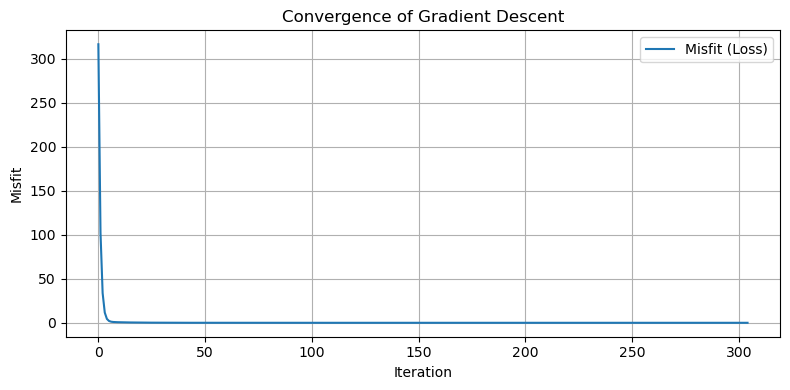

In [12]:
# Plot misfit vs iteration
plt.figure(figsize=(8, 4))
plt.plot(misfits, label='Misfit (Loss)')
plt.xlabel('Iteration')
plt.ylabel('Misfit')
plt.title('Convergence of Gradient Descent')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


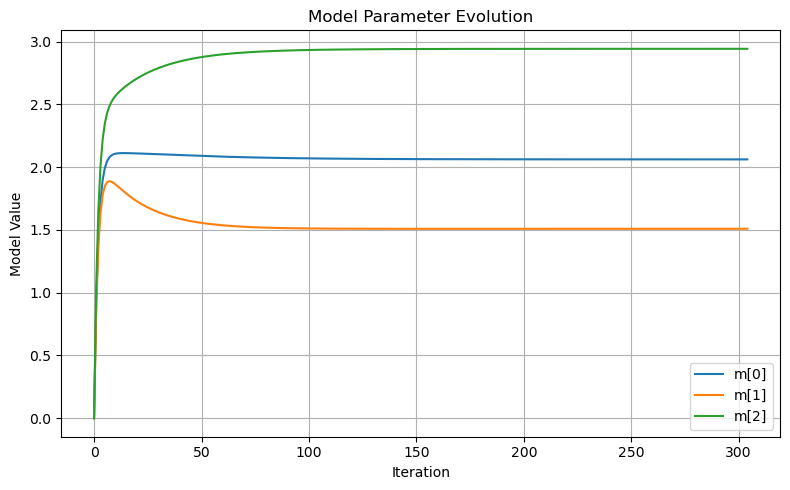

In [13]:
# Plot each model parameter vs iteration
plt.figure(figsize=(8, 5))
for i in range(models.shape[1]):
    plt.plot(models[:, i], label=f'm[{i}]')
plt.xlabel('Iteration')
plt.ylabel('Model Value')
plt.title('Model Parameter Evolution')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()